In [1]:
# Import everything I might need to use


import requests 
# import requests for api

import seaborn as sb 
# seaborn for graphs

import pandas as pd 
# pandas for data

import numpy as np 
# numpy for numerical things

pd.options.display.max_columns = 200 
# make the number of colums we can see 200


In [2]:
# Project Plan:

# My Goal is to find how optimal having a degree in the US is compared to other countries 

# How does the US compare to other countries salary wise
# if having a degree is worth it I want to figure out what degree is the best to pursue
# See real job postings and information on them

# Step 1: Find the top paying countries compared to the US

# Step 2: What degree is the best to pursue in the US and what college is best

# Step 3: Find real job posting on jobs and see how well the job does



In [3]:
# Data sources Used

# Step 1:
        # 1. CSV - Salary data on different countries

# Step 2:
    # Data from the Wall Street Journal
        # 1. CSV - Degrees and salaries
        # 2. CSV - College and salaries
    
# Step 3: 
    # api with data on linked in job posts
        #API - LinkedIn Job Posts

In [4]:
# Step 1 - Analyze the difference in salaries from country to country

In [5]:
countryDF=pd.read_csv("salary_data.csv")
# read the salary data csv file

countryDF
# show the data

,country_name,continent_name,wage_span,median_salary,average_salary,lowest_salary,highest_salary
0,Afghanistan,Asia,Monthly,853.740000,1001.150000,252.530000,4460.970000
1,Aland Islands,Europe,Monthly,3319.240000,3858.350000,972.520000,17124.740000
2,Albania,Europe,Monthly,832.840000,956.920000,241.220000,4258.490000
3,Algeria,Africa,Monthly,1148.840000,1308.810000,330.110000,5824.180000
4,American Samoa,Oceania,Monthly,1390.000000,1570.000000,400.000000,6980.000000
...,...,...,...,...,...,...,...
216,Virgin Islands (US),North America,Monthly,2380.000000,2710.000000,680.000000,12000.000000
217,Western Sahara,Africa,Monthly,908.560000,1011.670000,254.860000,4503.890000
218,Yemen,Asia,Monthly,120.980000,133.360000,33.620000,594.930000
219,Zambia,Africa,Monthly,0.261335,0.285524,0.072092,1.271103


In [6]:
# this shows us the data that we are going to be working with
# the country, continent, and then how the wage is payed, median, average, lowest, and highest salary




averageSalary = countryDF.sort_values("average_salary",ascending=False).head(10)
# solt the valuse by the average salary - Have it high to low - show the top 10

averageSalary
# show the data

,country_name,continent_name,wage_span,median_salary,average_salary,lowest_salary,highest_salary
192,Switzerland,Europe,Monthly,9836.07,11292.90,2850.27,50363.93
83,Guernsey,Europe,Monthly,8689.02,9409.76,2367.07,41869.51
209,United States,Northern America,Monthly,6966.00,7925.00,2000.00,35250.00
35,Canada,Northern America,Monthly,6311.03,7352.94,1850.00,32720.59
208,United Kingdom,Europe,Monthly,6300.00,7235.37,1829.27,32214.63
19,Belgium,Europe,Monthly,5729.39,6522.20,1997.89,27378.44
100,Jersey,Europe,Monthly,5817.07,6304.88,1585.37,28048.78
180,Singapore,Asia,Monthly,5647.06,6235.29,1573.53,27720.59
114,Liechtenstein,Europe,Monthly,5224.04,5825.14,1464.48,25901.64
53,Denmark,Europe,Monthly,5084.99,5779.04,1458.92,25637.39


/Users/santiago/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


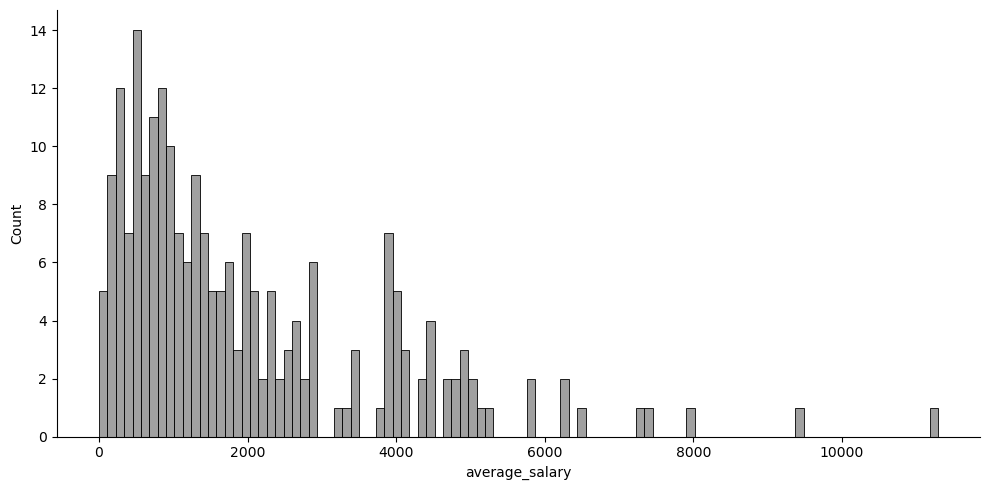

In [7]:
# this lets us see the top 10 countries with the highest average salary, putting the US at third




sb.displot(x="average_salary",kind="hist",data=countryDF,aspect=2,bins=100,color="Gray")
# seaborn dispolt - x is average salary - histogram - data we are using - aspect (how big) - bins how detailed



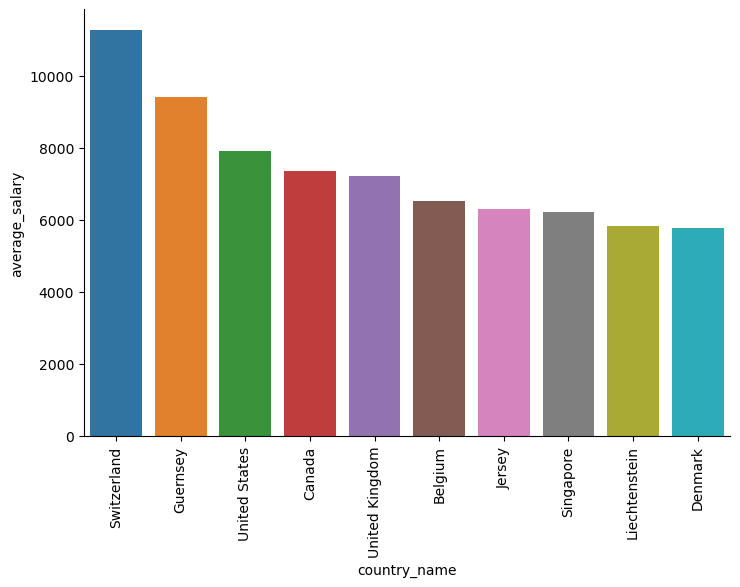

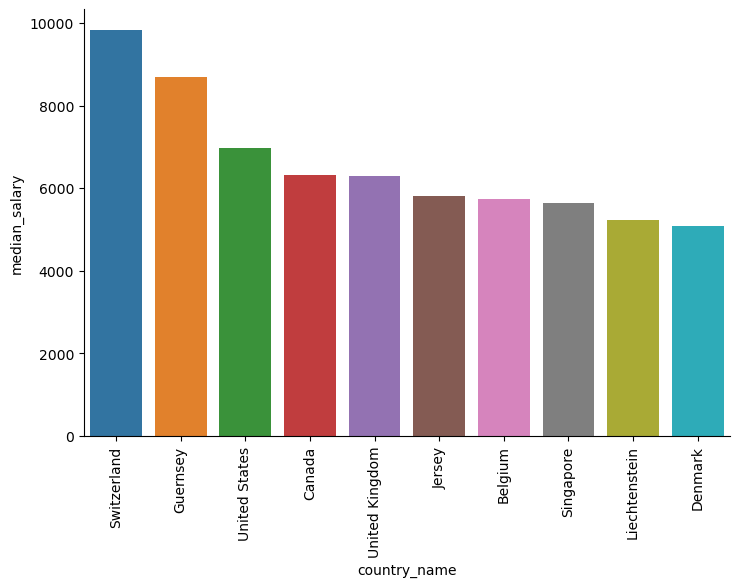

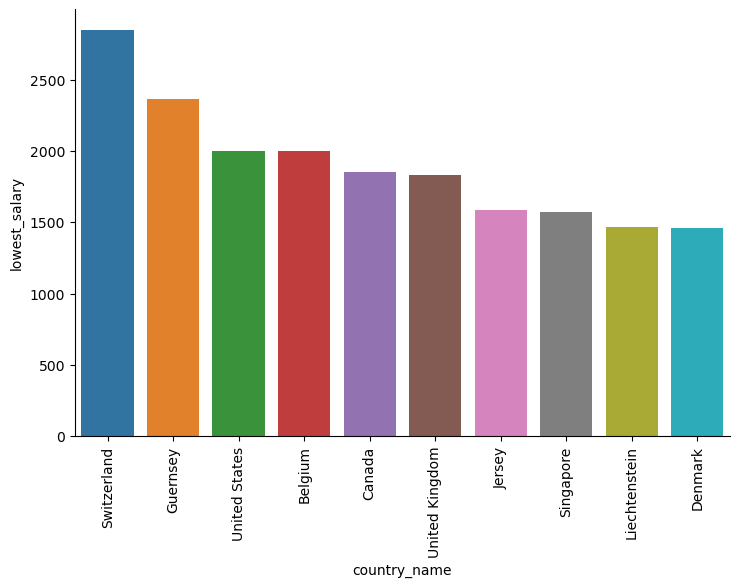

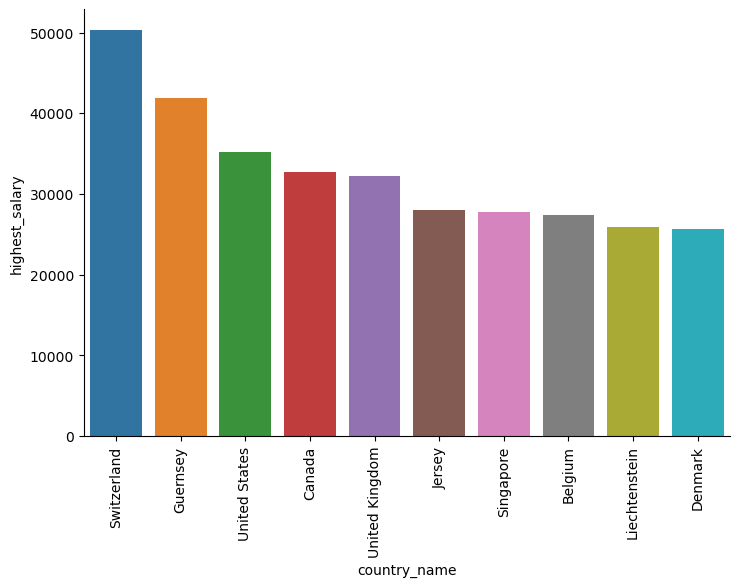

In [8]:
# this shows us all the countries average salay and how common that saliry is. 
# we can see that the top countries are way ahead of the rest and is a very visible gap in pay




medianSalary = countryDF.sort_values("median_salary",ascending=False).head(10)
# median salary function that will sort the valuse by the median salary - Have it high to low - show the top 10 

lowestSalary = countryDF.sort_values("lowest_salary",ascending=False).head(10)
# lowest salary function that will sort the valuse by the lowest salary - Have it high to low - show the top 10 


highestSalary = countryDF.sort_values("highest_salary",ascending=False).head(10)
# highest salary function that will sort the valuse by the highest salary - Have it high to low - show the top 10 



sb.catplot(x="country_name",y="average_salary",data=averageSalary,kind="bar",aspect=1.5
          ).set_xticklabels(rotation=90)
# a catplot showing the top 10 countries with the highest average salary

sb.catplot(x="country_name",y="median_salary",data=medianSalary,kind="bar",aspect=1.5
          ).set_xticklabels(rotation=90)
# a catplot showing the top 10 countries with the highest median salary


sb.catplot(x="country_name",y="lowest_salary",data=lowestSalary,kind="bar",aspect=1.5
          ).set_xticklabels(rotation=90)
# a catplot showing the top 10 countries with the lowest salary


sb.catplot(x="country_name",y="highest_salary",data=highestSalary,kind="bar",aspect=1.5
          ).set_xticklabels(rotation=90)
# a catplot showing the top 10 countries with the highest salary


In [9]:
# This lets us see all the top countries in each category of average, median, lowest and highest salary
# we can see that the order for the most part seems to maintain the same 





# Step 1 Take aways: 
# From this firts step we are able to see that through tall that data the united states, guernsey
# and switscerland seem to be the top 3 highets paying places overall
# we were also able to see that there was a visible gap in pay between the countries

In [10]:
# Step 2 - What degree is the best to pursue in the US and what college is best

In [11]:
degreePayDF = pd.read_csv("degrees-that-pay-back.csv")
# pandas read the csv with the data


In [12]:
degreePayDF.head()
# show the top 5 in the data

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [13]:
# here we can see the data we are going to be working with showin the majors and their pay




degreePayDF.columns = ['Major', 'Start', 'MidCareer', 'PercentChange', 'MidCareer10th',
            'MidCareer25th', 'MidCareer75th', 'MidCareer90th']
# rename the columns so that it is easier to use the data

degreePayDF.head()
#show the top 5 with the new columns

,Major,Start,MidCareer,PercentChange,MidCareer10th,MidCareer25th,MidCareer75th,MidCareer90th
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [14]:
# after renaming the collumns we can see that there are $ and commas that will prevent us from using the data





type(degreePayDF.Start[0])
# Show what type the data is
# since it has $ and , we need to get rid of it and turn it into a float from a string

str

In [15]:
salaryColumns = ['Start', 'MidCareer', 'MidCareer10th',
            'MidCareer25th', 'MidCareer75th', 'MidCareer90th']
# define the columns we want to change 


# https://www.programiz.com/python-programming/pandas/methods/series-str-replace Got Str replace help from here
    
for column in salaryColumns:
    # go through each of the colums that we specified
    
    degreePayDF[column] = degreePayDF[column].str.replace('$', '')
    # for that column, usae pandas str replace function to get rid of $ for an empty space and redifine the column
    
    degreePayDF[column] = degreePayDF[column].str.replace(',', '')
    # for that column, usae pandas str replace function to get rid of , for an empty space and redifine the column

    degreePayDF[column] = degreePayDF[column].astype(float) 
    # chnage the colums we defined form its current state of s trign to a float
    
degreePayDF.head()
# show the new data top 5

,Major,Start,MidCareer,PercentChange,MidCareer10th,MidCareer25th,MidCareer75th,MidCareer90th
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
2,Agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0
3,Anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0
4,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0


In [16]:
# we can now see that the data is fixed and ready to go!






type(degreePayDF.Start[0])
# the new type is a float 

numpy.float64

/Users/santiago/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/santiago/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


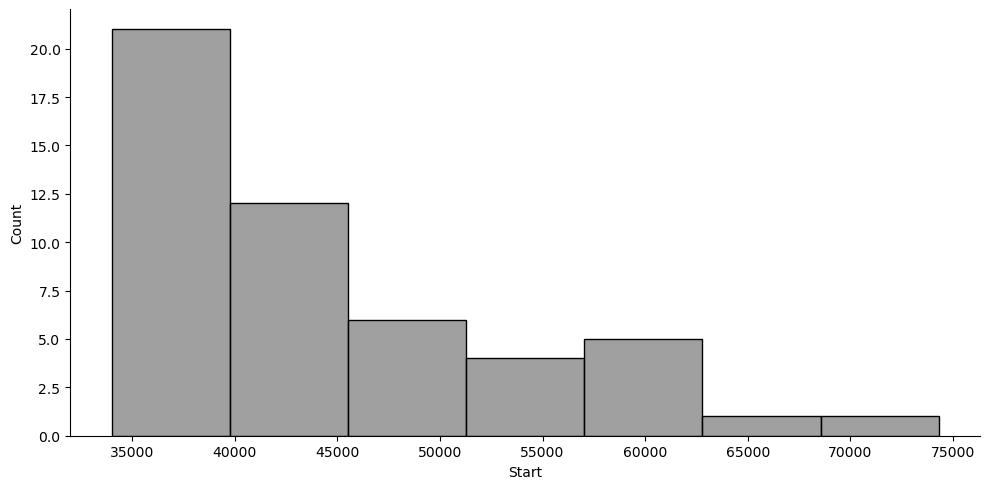

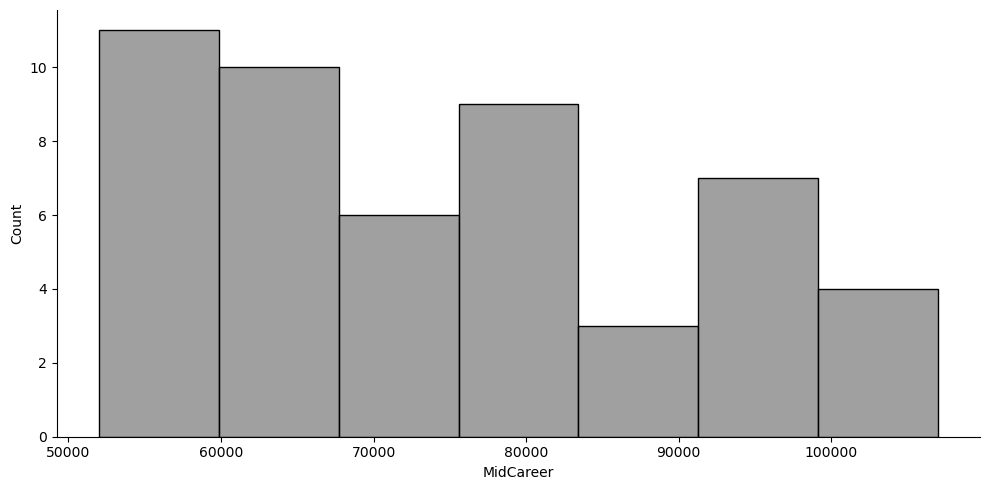

In [17]:
sb.displot(x="Start",kind="hist",data=degreePayDF,aspect=2,color="Gray")
# make a graph that has the new float data, for the start salary. - aspect to make it bigger - hist displot 

sb.displot(x="MidCareer",kind="hist",data=degreePayDF,aspect=2,color="Gray")
# make a graph that has the new float data, for the mid career salary. - aspect to make it bigger - hist displot 



In [18]:
# this shows us how the start carrer pay seeems to be around the same where it gets rarer the more you go 
# like a regresion curve 
# the mid carrer pay on the other hand does go down but a lot slower and laos has a higher low and high than 
# the starting pay




startPay = degreePayDF.sort_values("Start", ascending=False)[['Major','Start']].head()
# new data set where it shows the top 5 highest starting pay and only shows the major and start column
startPay

,Major,Start
43,Physician Assistant,74300.0
8,Chemical Engineering,63200.0
12,Computer Engineering,61400.0
19,Electrical Engineering,60900.0
38,Mechanical Engineering,57900.0


In [19]:
# here we can see the top 5 highest paying starting jobs with a lot being engineering




careerPercentiles = degreePayDF.sort_values("MidCareer", ascending=False)[['Major','MidCareer','MidCareer10th',
            'MidCareer25th', 'MidCareer75th', 'MidCareer90th']].reset_index().head()
# define a new data that will sort the values by highest mid carrer and only shows the major and mid career pays
# reset the index to simplify

careerPercentiles
# show the data

,index,Major,MidCareer,MidCareer10th,MidCareer25th,MidCareer75th,MidCareer90th
0,8,Chemical Engineering,107000.0,71900.0,87300.0,143000.0,194000.0
1,12,Computer Engineering,105000.0,66100.0,84100.0,135000.0,162000.0
2,19,Electrical Engineering,103000.0,69300.0,83800.0,130000.0,168000.0
3,1,Aerospace Engineering,101000.0,64300.0,82100.0,127000.0,161000.0
4,17,Economics,98600.0,50600.0,70600.0,145000.0,210000.0


In [20]:
# hwere we can see the top 5 highest paying jobs at mid career and we can see that it is mostly engineering
# with few being there from starting pay




careerPercentilesAbb = careerPercentiles.drop(columns=["MidCareer"])
# create an abbreviated data where it drops the mid carrer column 


careerPercentilesAbb
#show the new data

,index,Major,MidCareer10th,MidCareer25th,MidCareer75th,MidCareer90th
0,8,Chemical Engineering,71900.0,87300.0,143000.0,194000.0
1,12,Computer Engineering,66100.0,84100.0,135000.0,162000.0
2,19,Electrical Engineering,69300.0,83800.0,130000.0,168000.0
3,1,Aerospace Engineering,64300.0,82100.0,127000.0,161000.0
4,17,Economics,50600.0,70600.0,145000.0,210000.0


In [21]:
# We can see here that the collumns we dont want are dropped and gone


#https://aeturrell.github.io/python4DS/data-tidy.html got .melt help from here

careerPercentilesAbb = careerPercentilesAbb.melt(id_vars=["Major"])
# we use melt to change the data so that everithing but the major is changed into quanitative data for that major
# this in turn will then put all the collumns titles as data in a variable collumn
# and make a new column named value colum with the numerical data

/Users/santiago/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/santiago/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='variable', ylabel='value'>

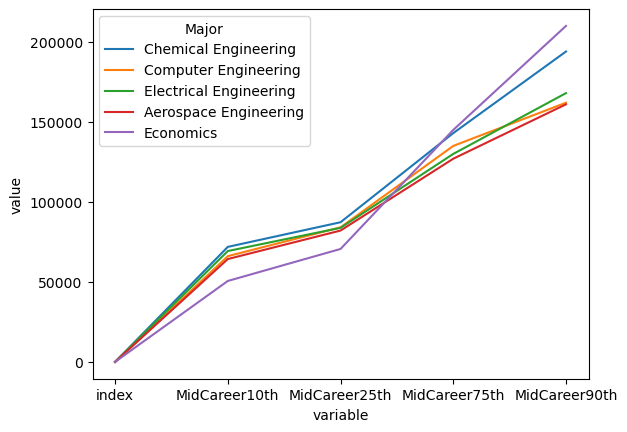

In [22]:
sb.lineplot(x="variable",y="value",data=careerPercentilesAbb,hue="Major")
# make a lineplot that has the new variable column as the x and the value data as y and the hue to show 
# what color corresponds to the major

In [23]:
# this line graph lets us see how the top 5 highest paying mid career degrees change by percentiles
# as you can see although economics is the lowest it overtakes by a good amount in the 90th percentile
# showing us that if you are the best of the best in economics you have more potential in pay than the 
# rest of the degrees




collegePayDF = pd.read_csv("salaries-by-region.csv")
# read the csv file with pandas

collegePayDF.head()
# show the top 5

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN


In [24]:
# here we can see the data that we will be using showing us the school name and their pay




collegePayDF.columns = ['SchoolName','Region', 'Start', 'MidCareer', 'MidCareer10th',
            'MidCareer25th', 'MidCareer75th', 'MidCareer90th']
# rename the tables so its easier to call when needed

In [25]:
needsAdjusting = ['Start', 'MidCareer', 'MidCareer10th',
            'MidCareer25th', 'MidCareer75th', 'MidCareer90th']
# define the columns we want to change 


# https://www.programiz.com/python-programming/pandas/methods/series-str-replace  Got Str replace help from here

for column in needsAdjusting:
        # go through each of the colums that we specified

    collegePayDF[column] = collegePayDF[column].str.replace('$', '')
        # for that column, usae pandas str replace function to get rid of $ for an empty space and redifine the column

    collegePayDF[column] = collegePayDF[column].str.replace(',', '')
        # for that column, usae pandas str replace function to get rid of , for an empty space and redifine the column

    collegePayDF[column] = collegePayDF[column].astype(float)
        # chnage the colums we defined form its current state of s trign to a float

collegePayDF.head()
# show the new data top 5

,SchoolName,Region,Start,MidCareer,MidCareer10th,MidCareer25th,MidCareer75th,MidCareer90th
0,Stanford University,California,70400.0,129000.0,68400.0,93100.0,184000.0,257000.0
1,California Institute of Technology (CIT),California,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Harvey Mudd College,California,71800.0,122000.0,NaN,96000.0,180000.0,NaN
3,"University of California, Berkeley",California,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0
4,Occidental College,California,51900.0,105000.0,NaN,54800.0,157000.0,NaN


In [26]:
# we can see the corrected data here ready to go!



topStartSchools = collegePayDF.sort_values("Start",ascending=False).head()
# make a new data that shows the top 5 schools with the highest start pay

topStartSchools
# show the data

,SchoolName,Region,Start,MidCareer,MidCareer10th,MidCareer25th,MidCareer75th,MidCareer90th
1,California Institute of Technology (CIT),California,75500.0,123000.0,NaN,104000.0,161000.0,NaN
222,Massachusetts Institute of Technology (MIT),Northeastern,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0
2,Harvey Mudd College,California,71800.0,122000.0,NaN,96000.0,180000.0,NaN
0,Stanford University,California,70400.0,129000.0,68400.0,93100.0,184000.0,257000.0
221,Princeton University,Northeastern,66500.0,131000.0,68900.0,100000.0,190000.0,261000.0


In [27]:
# this is showing us the top 5 schools with the highest starting pay



topMidSchools = collegePayDF.sort_values("MidCareer",ascending=False).head(10)
# new data that shows the top 10 schools with the highest mid career pay

topMidSchools
# Show the data

,SchoolName,Region,Start,MidCareer,MidCareer10th,MidCareer25th,MidCareer75th,MidCareer90th
220,Dartmouth College,Northeastern,58000.0,134000.0,63100.0,90200.0,234000.0,321000.0
221,Princeton University,Northeastern,66500.0,131000.0,68900.0,100000.0,190000.0,261000.0
0,Stanford University,California,70400.0,129000.0,68400.0,93100.0,184000.0,257000.0
222,Massachusetts Institute of Technology (MIT),Northeastern,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0
223,Yale University,Northeastern,59100.0,126000.0,58000.0,80600.0,198000.0,326000.0
224,Harvard University,Northeastern,63400.0,124000.0,54800.0,86200.0,179000.0,288000.0
1,California Institute of Technology (CIT),California,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Harvey Mudd College,California,71800.0,122000.0,NaN,96000.0,180000.0,NaN
225,University of Pennsylvania,Northeastern,60900.0,120000.0,55900.0,79200.0,192000.0,282000.0
70,University of Notre Dame,Midwestern,56300.0,116000.0,66400.0,85100.0,163000.0,235000.0


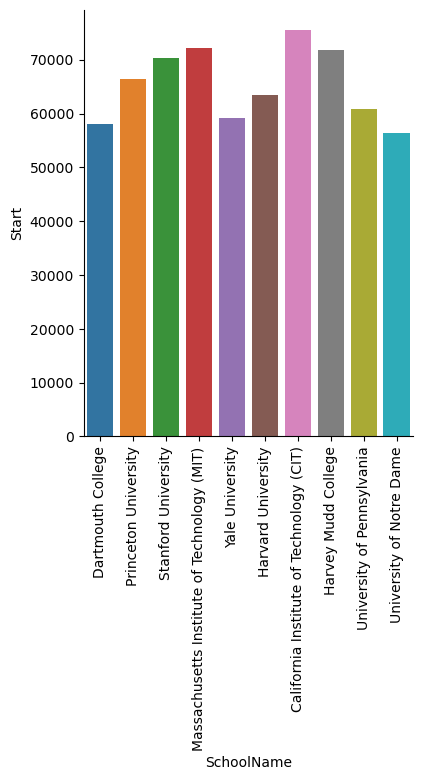

In [28]:
# this shows us the top 10 schools with the higest mid career pay, we can see that all the top 5 
# starting list made this one aswell but in new order. Especially CIT dropping from 1 to 7





sb.catplot(x="SchoolName",y="Start",data=topMidSchools,kind="bar").set_xticklabels(rotation=90)
# make a catplot that has the school name as the x and the start pay as y, and data with the top 10 mid pay schools
# and the kind is a bar graph with college names roated 90 degrees

/Users/santiago/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/santiago/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/santiago/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/santiago/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

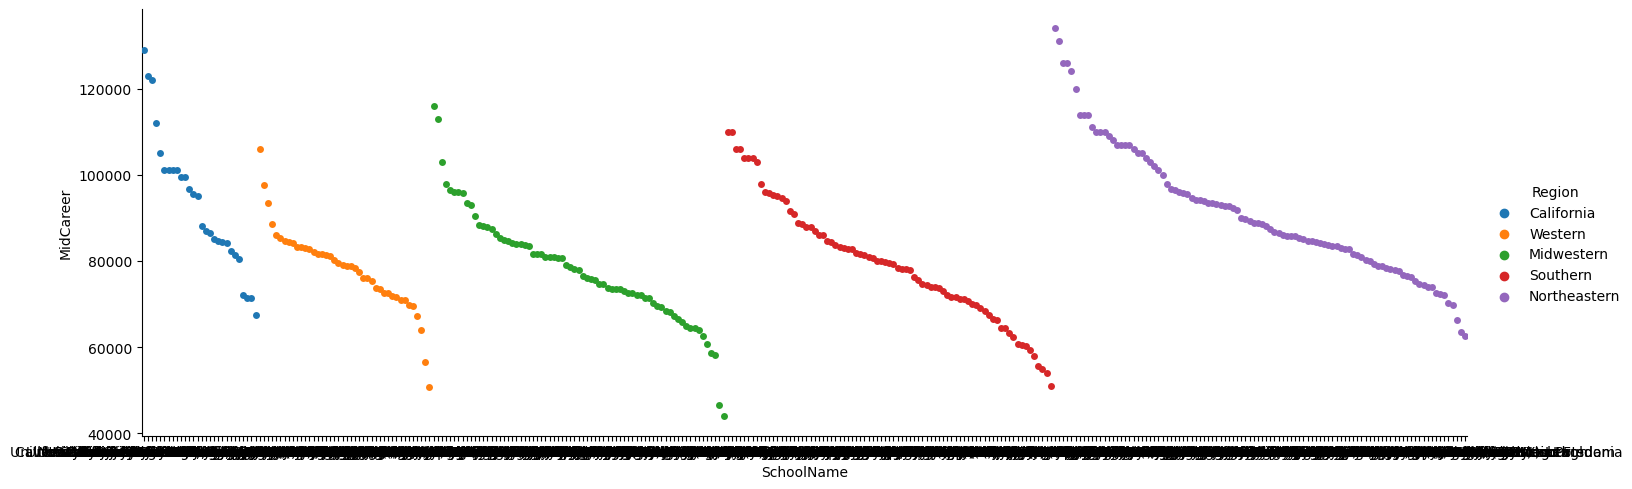

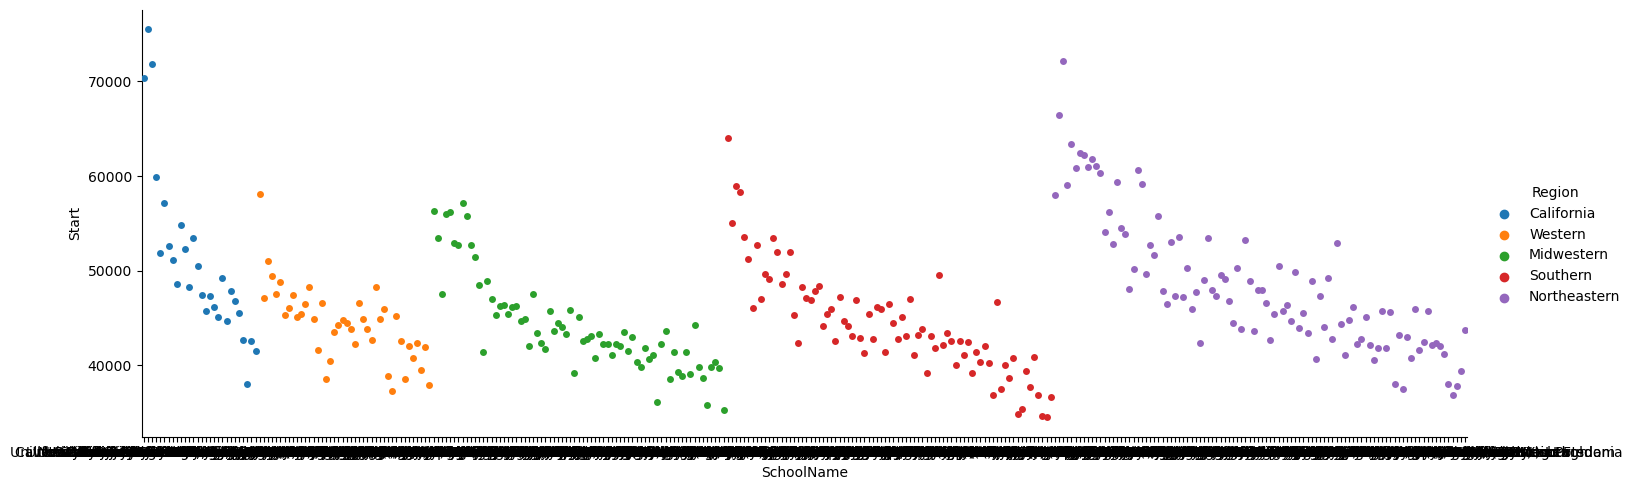

In [29]:
# this shows us the top 10 schools with the higest mid career pay how they compare to starting pay
# as we can see here more clearly, CIT has the highest starting pay but falls behind at 7th for mid career pay
# Darthmouth having the second lowest starting pay but the highest mid pay




regeionGroupedPlot1a = sb.catplot(x="SchoolName",y="MidCareer",data=collegePayDF,hue="Region",
           aspect=3)
# make a scatterplot that will have the school as the x and mid career pay as the y. The data is the collegepay
# the hue will be the region so that we can see the pay in different regions

regeionGroupedPlot1b = sb.catplot(x="SchoolName",y="Start",data=collegePayDF,hue="Region",
           aspect=3)
# make a scatterplot that will have the school as the x and start career pay as the y. The data is the collegepay
# the hue will be the region so that we can see the pay in different regions

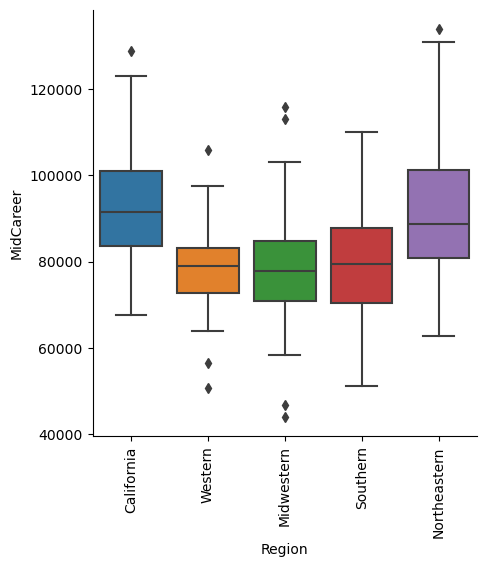

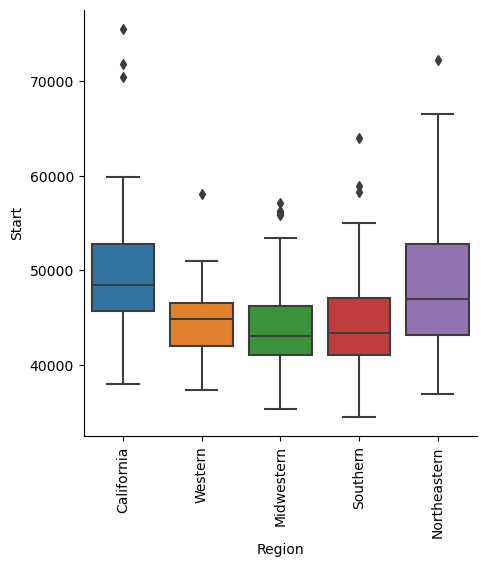

In [30]:
# This shows us the data by region and comparing that region to the start and mid career pay
# we can see how they compare but the data is a little hard to understand and there are more schools for some
# regions compared to others making it hard to see the difference




regeionGroupedPlot2a = sb.catplot(x="Region",y="MidCareer",data=collegePayDF,
           kind="box").set_xticklabels(rotation=90)
# make a boxplot that will show the region data more organized with the x being the region and the y being the
# mid carrer pay, and kind for box plot, data is the original college pay df

regeionGroupedPlot2b = sb.catplot(x="Region",y="Start",data=collegePayDF,
           kind="box").set_xticklabels(rotation=90)
# make a boxplot that will show the region data more organized with the x being the region and the y being the
# Start  pay, and kind for box plot, data is the original college pay df

In [31]:
# these cat plots show us the distribution of college school pay by regions 
# we can see that they are roughly the same for starting and mid pay
# california seems to have the best mean fot both while northeastern has a very wide range but a lso having
# the secong highest mean for both
# A lot better than the scatter plot


westernColleges = collegePayDF.query("Region=='Western'")
# make a new function that has only schools from the western region

westernColleges.sort_values("MidCareer",ascending=False).reset_index().head(10)
# show the top ten schools from the wetern region that have the higest mid career pay


,index,SchoolName,Region,Start,MidCareer,MidCareer10th,MidCareer25th,MidCareer75th,MidCareer90th
0,28,Colorado School of Mines,Western,58100.0,106000.0,62200.0,87900.0,142000.0,201000.0
1,29,University of Colorado - Boulder (UCB),Western,47100.0,97600.0,51600.0,69000.0,128000.0,187000.0
2,30,New Mexico Institute of Mining and Technology ...,Western,51000.0,93400.0,NaN,67400.0,123000.0,NaN
3,31,Brigham Young University (BYU),Western,49400.0,88600.0,50600.0,68500.0,119000.0,164000.0
4,32,University of Arizona,Western,47500.0,86100.0,44800.0,61700.0,117000.0,160000.0
5,33,University of Washington (UW),Western,48800.0,85300.0,47000.0,59800.0,115000.0,149000.0
6,34,Washington State University (WSU),Western,45300.0,84700.0,43600.0,59000.0,113000.0,162000.0
7,35,University of Colorado - Denver,Western,46100.0,84400.0,46400.0,58600.0,105000.0,144000.0
8,36,Arizona State University (ASU),Western,47400.0,84100.0,44600.0,60700.0,114000.0,163000.0
9,37,Oregon State University (OSU),Western,45100.0,83300.0,46900.0,64000.0,113000.0,146000.0


In [32]:
# here we can see the top 10 schools in the western region by mid pay, colorado schools being up there a few 
# times especially at the 1 and 2 spots




coloradoColleges = collegePayDF.query("SchoolName=='Colorado School of Mines' or SchoolName == 'Colorado College (CC)' or SchoolName == 'University of Colorado - Boulder (UCB)' or SchoolName == 'University of Colorado - Denver'or SchoolName == 'Colorado State University (CSU)'or SchoolName == 'Regis University'")
# make a dataset with the colleges being colleges from colorado. query makes it so only those colleges are shown

coloradoColleges
# Show the colleges

,SchoolName,Region,Start,MidCareer,MidCareer10th,MidCareer25th,MidCareer75th,MidCareer90th
28,Colorado School of Mines,Western,58100.0,106000.0,62200.0,87900.0,142000.0,201000.0
29,University of Colorado - Boulder (UCB),Western,47100.0,97600.0,51600.0,69000.0,128000.0,187000.0
35,University of Colorado - Denver,Western,46100.0,84400.0,46400.0,58600.0,105000.0,144000.0
44,Colorado College (CC),Western,38500.0,81400.0,NaN,43000.0,148000.0,NaN
48,Colorado State University (CSU),Western,44800.0,79000.0,43800.0,57100.0,112000.0,150000.0
56,Regis University,Western,48300.0,73800.0,41000.0,55500.0,94800.0,117000.0


<Axes: xlabel='Start', ylabel='MidCareer'>

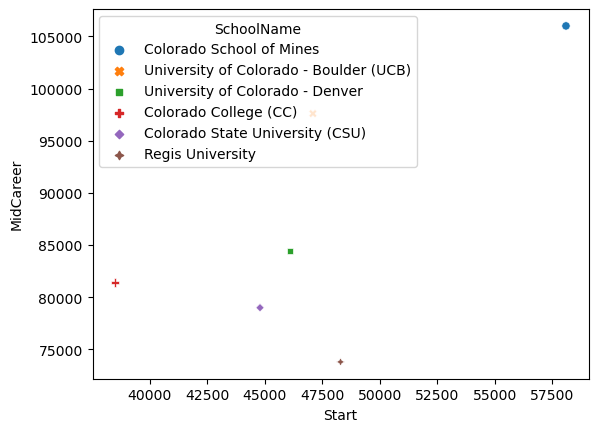

In [33]:
# here we can see the colorado schools by themselves ranked by the to starting career pay
# boulder at number 2!!!!!





sb.scatterplot(x="Start",y="MidCareer",data=coloradoColleges,hue="SchoolName",style="SchoolName")
# scatterplot showing the start pay at the x and mid pay at the y, data is colorado colleges, hue is school name
# style makes it so that the hue has different shapes for the differnct colleges. 

In [34]:
# this shows us how the difference is schools over start and mid carrer pay are
# boulder being up there but school of mines is in a category of its own wayyyyy up there



coloradoCollegesDFAbb = coloradoColleges.drop(columns=["Region","Start","MidCareer"])
# create an abreviated funciton that will drop the columns that dont involve mid carre percentage pay

coloradoCollegesDFAbb
# show the new data

,SchoolName,MidCareer10th,MidCareer25th,MidCareer75th,MidCareer90th
28,Colorado School of Mines,62200.0,87900.0,142000.0,201000.0
29,University of Colorado - Boulder (UCB),51600.0,69000.0,128000.0,187000.0
35,University of Colorado - Denver,46400.0,58600.0,105000.0,144000.0
44,Colorado College (CC),NaN,43000.0,148000.0,NaN
48,Colorado State University (CSU),43800.0,57100.0,112000.0,150000.0
56,Regis University,41000.0,55500.0,94800.0,117000.0


In [35]:
# here we see the new data with the collumns we dont want dropped


#https://aeturrell.github.io/python4DS/data-tidy.html got .melt help from here

coloradoCollegesDFAbb = coloradoCollegesDFAbb.melt(id_vars=["SchoolName"])
# we use melt to change the data so that everithing but the schoolname is changed into quanitative data
# this in turn will then replace all the collumns titles as data in a new variable collumn
# and make a new column named value colum with the numerical data

/Users/santiago/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/santiago/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='variable', ylabel='value'>

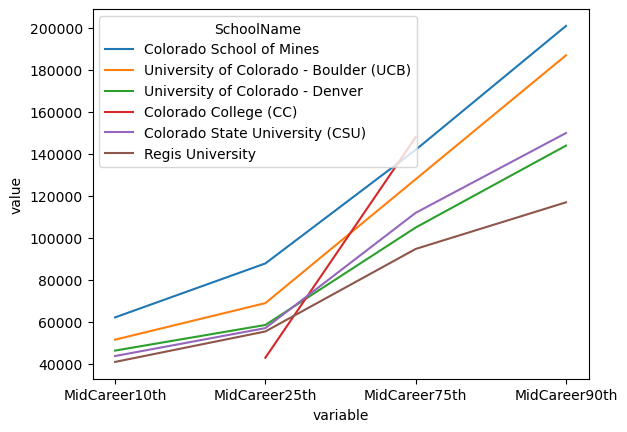

In [36]:
sb.lineplot(x="variable",y="value",data=coloradoCollegesDFAbb,hue="SchoolName")
# make a line plot with the new variable data as the x axis and the new values as the y axis with the school 
# name as the hue so we can see what color the school is in the graph

In [37]:
# This shows us the career pay percentages for colorado schoolsand we can see that they keep the same order 
# the only one going out of order being colorado college surpassing all in the 75th percentile but sadly
# there was no dat for top 90th for us to see where it would go next

In [38]:
# Step 2 Take aways - The top school seem to stay there for starting and mid career pay with a lot of them 
# being ivy legue schools
# colorado schools seem to do alright with boulder doing very well at number 2 in the western region
# and school of mines being the number one in the wester region for both starting and mid career pay

In [39]:
# Step 3 - Find real job posting on jobs and see how well the job does

In [40]:
#https://rapidapi.com/rockapis-rockapis-default/api/linkedin-data-api/  I got help from here my api link


url = "https://linkedin-data-api.p.rapidapi.com/search-jobs"
# define the url for the api

headers = {
    "X-RapidAPI-Key": "75c6299175msh18fd90de04f9314p162fddjsne87066c14ec6",
    "X-RapidAPI-Host": "linkedin-data-api.p.rapidapi.com"
}
# headers that the request will take in in order to use

linkedInApi = requests.get(url, headers=headers, params={ # parameters were defined in the webiste that
    # indicate how to adjust the data given - dictionary with all of the parameters
    
    "keywords": "golang",# keywords was a required perameter that didn't effect the data
    "locationId": "92000000", # this locatoin id was taken form linked in url that represents worldwide
    "salary": "80K+", # salary perameter, only 80k+ jobs salary shown
    "titleIds": "43", # id 43 was taken from the linked website when lookin up specific jobs, taken from the url
    # 43 is intended for business jobs require economics or something related to economics 
    # I did economics because it was in the top 5 highest paying and I am a business student
    # (from linked in search tool)
    "sort": "mostRecent" # this just filters it for the most reasent jobs postings first
    
}).json() # change the api to json so we can see it easier


In [41]:
linkedInApi # show the api

{'success': True,
 'message': '',
 'data': [{'id': '3914116944',
   'title': 'Officemanager',
   'url': 'https://www.linkedin.com/jobs/view/3914116944',
   'referenceId': '3ZaovYyzoRY3ik+TdvtKRw==',
   'posterId': '530965025',
   'company': {'name': 'Jooble',
    'logo': 'https://media.licdn.com/dms/image/D4D0BAQHetHjFyZUj-Q/company-logo_200_200/0/1698922171426/jooble_logo?e=1722470400&v=beta&t=GJZQ7AnWDPK2CpuctAnMv9d6B-Y1dxjGC5NgVBzHozc',
    'url': 'https://www.linkedin.com/company/jooble/life',
    'staffCountRange': {},
    'headquarter': {}},
   'location': 'Landsmeer, North Holland, Netherlands (On-site)',
   'type': 'Full-time',
   'postDate': '2 hours ago'},
  {'id': '3909914920',
   'title': 'Officemanager',
   'url': 'https://www.linkedin.com/jobs/view/3909914920',
   'referenceId': '3ZaovYyzoRY3ik+TdvtKRw==',
   'posterId': '88469084',
   'company': {'name': 'Unique',
    'logo': 'https://media.licdn.com/dms/image/D4E0BAQHRqz0Ux2cWdg/company-logo_200_200/0/1684762052004/uniq

In [42]:
# this shows us the api and what we are working with



linkedInApi.keys() # show the api keys

dict_keys(['success', 'message', 'data', 'total'])

In [43]:
# the keys let us see how to go through the api data



linkedInApi['total'] # total shows us how many job listings there are

92

In [44]:
# 65 total job findings for the description we want



linkedInApi['data'] # show the data in the data key

[{'id': '3914116944',
  'title': 'Officemanager',
  'url': 'https://www.linkedin.com/jobs/view/3914116944',
  'referenceId': '3ZaovYyzoRY3ik+TdvtKRw==',
  'posterId': '530965025',
  'company': {'name': 'Jooble',
   'logo': 'https://media.licdn.com/dms/image/D4D0BAQHetHjFyZUj-Q/company-logo_200_200/0/1698922171426/jooble_logo?e=1722470400&v=beta&t=GJZQ7AnWDPK2CpuctAnMv9d6B-Y1dxjGC5NgVBzHozc',
   'url': 'https://www.linkedin.com/company/jooble/life',
   'staffCountRange': {},
   'headquarter': {}},
  'location': 'Landsmeer, North Holland, Netherlands (On-site)',
  'type': 'Full-time',
  'postDate': '2 hours ago'},
 {'id': '3909914920',
  'title': 'Officemanager',
  'url': 'https://www.linkedin.com/jobs/view/3909914920',
  'referenceId': '3ZaovYyzoRY3ik+TdvtKRw==',
  'posterId': '88469084',
  'company': {'name': 'Unique',
   'logo': 'https://media.licdn.com/dms/image/D4E0BAQHRqz0Ux2cWdg/company-logo_200_200/0/1684762052004/unique_logo?e=1722470400&v=beta&t=_5sobLeFtyJGtzlwQ0b0DrqKMM9G1sHT

In [45]:
# hre we can see the data for the job postings with the titles, links, all of that



for job in linkedInApi['data']:
    # go through each think in the data key
    
    print(job['title'])
    # for keys labled title print that title of the job
    


Officemanager
Officemanager
Kontorchef til Intern Kommunikation, Kultur og Brand
Officemanager
Fahnen Kössinger GmbH: Kaufmann / Kauffrau (m/w/d) für Büromanagement im Bereich Werbetechnik
Officemanager
Office Manager - administratief medewerker
Officemanager
Officemanager
Ausbildung Kauffrau/Kaufmann für Büromanagement - Finance (all genders)
Directiesecretaresse / Office Manager, 24-28 uur per week, bij uitgeverij in Amsterdam
Officemanager
Mitarbeiter (m/w/d) im Office Management
Ausbildung zur Kauffrau/-mann für Büromanagement (m/w/d)
Rezeption & Office Management (m/w/d)
Officemanager
Officemanager
Officemanager
Ausbildung zur/m Kauffrau/-mann für Büromanagement (m/w/d)
Officemanager
Officemanager Dilbeek
Kaufleute für Büromanagement - Ausbildungsstart 15.08.2025
Kaufmann / Kauffrau für Büromanagement (m/w/d)
Officemanager
Officemanager


In [46]:
# here we can see all the job titles for the jobs we looked for 



for job in linkedInApi['data']:
    # go thorugh each thing about the jobs in the data key
    
    print("Job Title: "+job["title"]+ 
          # print the job title 
          
         "\n\tJob Pay: "+job["postDate"]+ "\n\tJob Link: "+job["url"]+"\n")
        # print the post date and the job link
        # \n is a new line
        # \t is tab - both of these to make the data easy to read

Job Title: Officemanager
	Job Pay: 2 hours ago
	Job Link: https://www.linkedin.com/jobs/view/3914116944

Job Title: Officemanager
	Job Pay: 6 hours ago
	Job Link: https://www.linkedin.com/jobs/view/3909914920

Job Title: Kontorchef til Intern Kommunikation, Kultur og Brand
	Job Pay: 1 day ago
	Job Link: https://www.linkedin.com/jobs/view/3914693302

Job Title: Officemanager
	Job Pay: 1 day ago
	Job Link: https://www.linkedin.com/jobs/view/3909947497

Job Title: Fahnen Kössinger GmbH: Kaufmann / Kauffrau (m/w/d) für Büromanagement im Bereich Werbetechnik
	Job Pay: 2 days ago
	Job Link: https://www.linkedin.com/jobs/view/3911818247

Job Title: Officemanager
	Job Pay: 2 days ago
	Job Link: https://www.linkedin.com/jobs/view/3908893983

Job Title: Office Manager - administratief medewerker
	Job Pay: 2 days ago
	Job Link: https://www.linkedin.com/jobs/view/3870569320

Job Title: Officemanager
	Job Pay: 2 days ago
	Job Link: https://www.linkedin.com/jobs/view/3913352653

Job Title: Officeman

In [47]:
# lastly this shows us just how quick job postings are showing up and the link to those job postings

In [48]:
# Step 3 Take aways - There are a lot of jobs in linked in that pay well. Overall the high paying jobs are going
# to be possitions that requere managerial skills and a lot of experience though